# Recomendation Environment Dynamics
## Initializing Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import dirichlet 
import seaborn as sns
import matplotlib.pyplot as plt

## Functions to Learn Utility
get_Vui(u, i) returns the total utility for user u and item i<br/>
get_nui() returns the noisy probablistic proportion of utility known to user current mu is set to 0.98


In [3]:
def get_mu(v1, v2):
    mu = np.dot(v1,v2)
    return mu

def get_alpha_beta(mu, sigma=10**(-5)):
    a1 = (mu**2)*(((1-mu)/sigma**2)-(1/mu))
    b1 = a1*((1/mu)- 1)
    return a1, b1

def get_Vui(u,i):
    global p
    global a
    B_mu = get_mu(p[u-1],a[i-1])
    alpha, beta = get_alpha_beta(B_mu)
    return float(np.random.beta(alpha,beta))

def get_nui(mu = 0.98):
    alpha, beta = get_alpha_beta(mu)
    return float(np.random.beta(alpha,beta))

## Functions to Obtain Heatmap of Preferences
cmap is curtently set to "Greens" but can be changed to as needed

In [4]:
def conv_index_to_bins(index):
    """Calculate bins to contain the index values.
    The start and end bin boundaries are linearly extrapolated from 
    the two first and last values. The middle bin boundaries are 
    midpoints.

    Example 1: [0, 1] -> [-0.5, 0.5, 1.5]
    Example 2: [0, 1, 4] -> [-0.5, 0.5, 2.5, 5.5]
    Example 3: [4, 1, 0] -> [5.5, 2.5, 0.5, -0.5]"""
    assert index.is_monotonic_increasing or index.is_monotonic_decreasing

    # the beginning and end values are guessed from first and last two
    start = index[0] - (index[1]-index[0])/2
    end = index[-1] + (index[-1]-index[-2])/2

    # the middle values are the midpoints
    middle = pd.DataFrame({'m1': index[:-1], 'p1': index[1:]})
    middle = middle['m1'] + (middle['p1']-middle['m1'])/2

    if isinstance(index, pd.DatetimeIndex):
        idx = pd.DatetimeIndex(middle).union([start,end])
    elif isinstance(index, (pd.Float64Index,pd.RangeIndex,pd.Int64Index)):
        idx = pd.Float64Index(middle).union([start,end])
    else:
        print('Warning: guessing what to do with index type %s' % 
              type(index))
        idx = pd.Float64Index(middle).union([start,end])

    return idx.sort_values(ascending=index.is_monotonic_increasing)

def calc_df_mesh(df):
    """Calculate the two-dimensional bins to hold the index and 
    column values."""
    return np.meshgrid(conv_index_to_bins(df.index),
                       conv_index_to_bins(df.columns))

def heatmap(df):
    """Plot a heatmap of the dataframe values using the index and 
    columns"""
    X,Y = calc_df_mesh(df)
    c = plt.pcolormesh(X, Y, df.values.T, cmap = 'gist_yarg')
    plt.colorbar(c)

## Function for Rank

In [ ]:
def get_function_series(items):
    return

## Initializing Variables

n_u > Number of Users

n_i > Number of Items

num_rec > number of recomendations

alpha_user > drichlet concentration for users

alpha_items > drichlet concentration for items

K_pref_dimensions > dimensions of preference function

simulation steps > number of runs of the simulation environment

In [5]:
n_u = 100
n_i = 150
num_rec = 150
alpha_user = 1
alpha_item = 100
K_pref_dimensions = 20
simulation_steps = 5

## Creating Pandas DataFrames to Store Utility
V_df is a user-item matrix of total utilities<br/>
P_df is a user-item matrix of known utilities<br/>

P_df(u,i) = nui * V_df(u,i)

In [6]:
col = np.arange(1, n_i+1, 1)
empty_data_row = [float(0) for item in range(1, n_i+1)]
empty_data = np.array([empty_data_row for item in range(1, n_u+2)])

V_df = pd.DataFrame(empty_data, columns = col)
P_df = pd.DataFrame(empty_data, columns = col)
V_df = V_df.drop([0], axis = 0)
P_df = P_df.drop([0], axis = 0)

## Creating User and Item Preference Vectors
p is a np.array of shape (n_u, K_pref_dimensions) 

a is a np.array of shape (n_i, K_pref_dimensions)

each K-dimensional vector characterizes the user or item preference in p and a, respectively 

In [7]:
p = dirichlet.rvs([alpha_user]*K_pref_dimensions, size=n_u)
a = dirichlet.rvs([alpha_item]*K_pref_dimensions, size=n_i)

## Iterating Over Users and Items to Store Utility Values

In [8]:
for item in range(1,n_i+1):
    for user in range(1, n_u+1):
        Vui = get_Vui(user,item)
        V_df[item][user] = Vui
        known_proportion = get_nui()
        P_df[item][user] = Vui*known_proportion

## Creating Heatmap of Known Utilities DataFrame

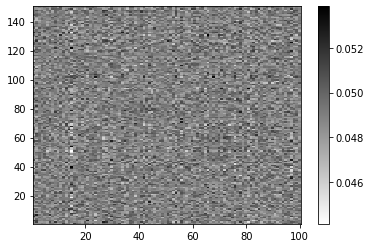

In [9]:
heatmap(P_df)

## Simulation Environemnt 
### Iterating over number of simulation steps and over individual users in each simulation step 

In [ ]:
for t in range(simulations_step):
    for user in range(1, n_u+1):
        # Proxy for getting an ordered list of recommendations
        ## to be replaced by a function that outputs an ordered list of recommendations
        ranked_recomendations = np.random.choice(np.arange(1,n_i+1,1),num_rec, replace= False)
        #reordering utilities according to the ranked orders 
        user_utilities = P_df.loc[user]
        user_utilities_ordered = user_utilities.reindex(ranked_recomendations)
        #functional value according to rank 
        ## chosen function should place higher value on new recommendations 
        
        
        # X_choice is the Product of utility values with rank function to get item choice
        
        ## maximum of X_choice for a deterministic model 
        
        
        ## maximum of X_choice if over a given threshold for varyying levels of user interaction 
        
        
        ## return positive rating for item correcponding to choice
        ### returned as a tuple (u, i, rating) added to a list
        
    # list of tuples to be added to the dataset for next recomendations 
    
    
    ## Proxy for snapshot of dynamics
    
#end